Используемый датасет: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

# Основные инструменты анализа данных

# Pandas

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.precision', 2)

In [3]:
data = pd.read_csv('dataset/Housing.csv')
data.shape

(545, 13)

In [4]:
data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
107,6125000,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
139,5740000,6360,3,1,1,yes,yes,yes,no,yes,2,yes,furnished
529,2275000,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
258,4480000,4040,3,1,2,yes,no,no,no,no,1,no,semi-furnished
105,6160000,4500,3,1,4,yes,no,no,no,yes,0,no,unfurnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.45e+02,545.00,545.00,545.00,545.00,545.00
mean,4.77e+06,5150.54,2.97,1.29,1.81,0.69
std,1.87e+06,2170.14,0.74,0.50,0.87,0.86
min,1.75e+06,1650.00,1.00,1.00,1.00,0.00
25%,3.43e+06,3600.00,2.00,1.00,1.00,0.00
50%,4.34e+06,4600.00,3.00,1.00,2.00,0.00
75%,5.74e+06,6360.00,3.00,2.00,2.00,1.00
max,1.33e+07,16200.00,6.00,4.00,4.00,3.00


In [7]:
data.duplicated().sum()

0

In [8]:
data.groupby('furnishingstatus').agg({'price': ['mean', 'median']})

price          
                      mean    median
furnishingstatus                    
furnished         5.50e+06  5.08e+06
semi-furnished    4.91e+06  4.58e+06
unfurnished       4.01e+06  3.43e+06

In [9]:
data['avg_area'] = data['area']/data['stories']

In [10]:
idx = (data['price'] - data['price'].mean()).abs() > 3*data['price'].std()
print(f'# Outliers: {idx.sum()}')
data = data[~idx]

# Outliers: 6


<Axes: >

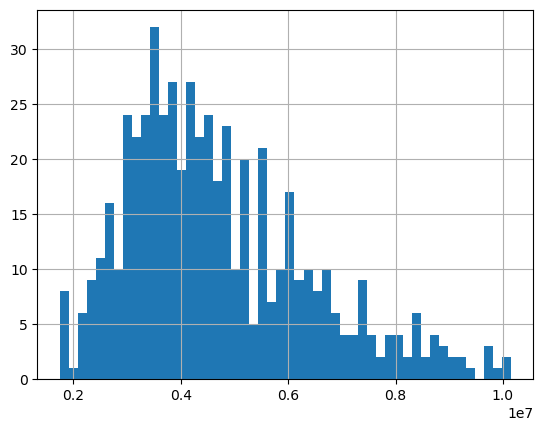

In [12]:
data.price.hist(bins=50)

<Axes: xlabel='area', ylabel='price'>

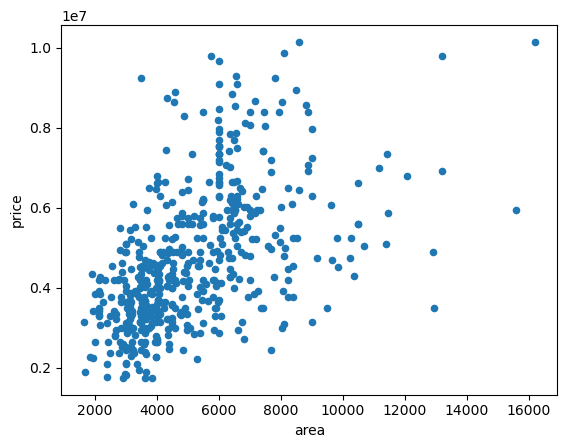

In [13]:
data.plot(x='area', y='price', kind='scatter')

# Matplotlib

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price distribution')

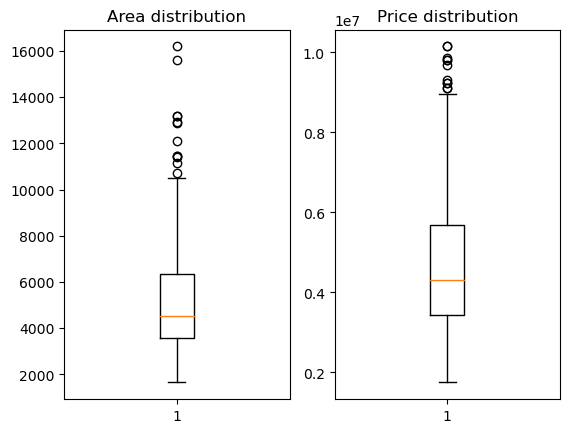

In [15]:
plt.subplot(1, 2, 1)
plt.boxplot(data.area)
plt.title('Area distribution');
plt.subplot(1, 2, 2)
plt.boxplot(data.price)
plt.title('Price distribution')


# Seaborn

In [16]:
import seaborn as sns

<Axes: xlabel='airconditioning', ylabel='price'>

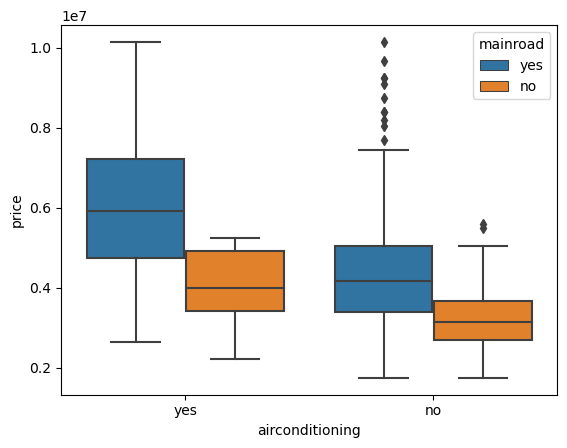

In [17]:
sns.boxplot(data, x='airconditioning', y='price', hue='mainroad')

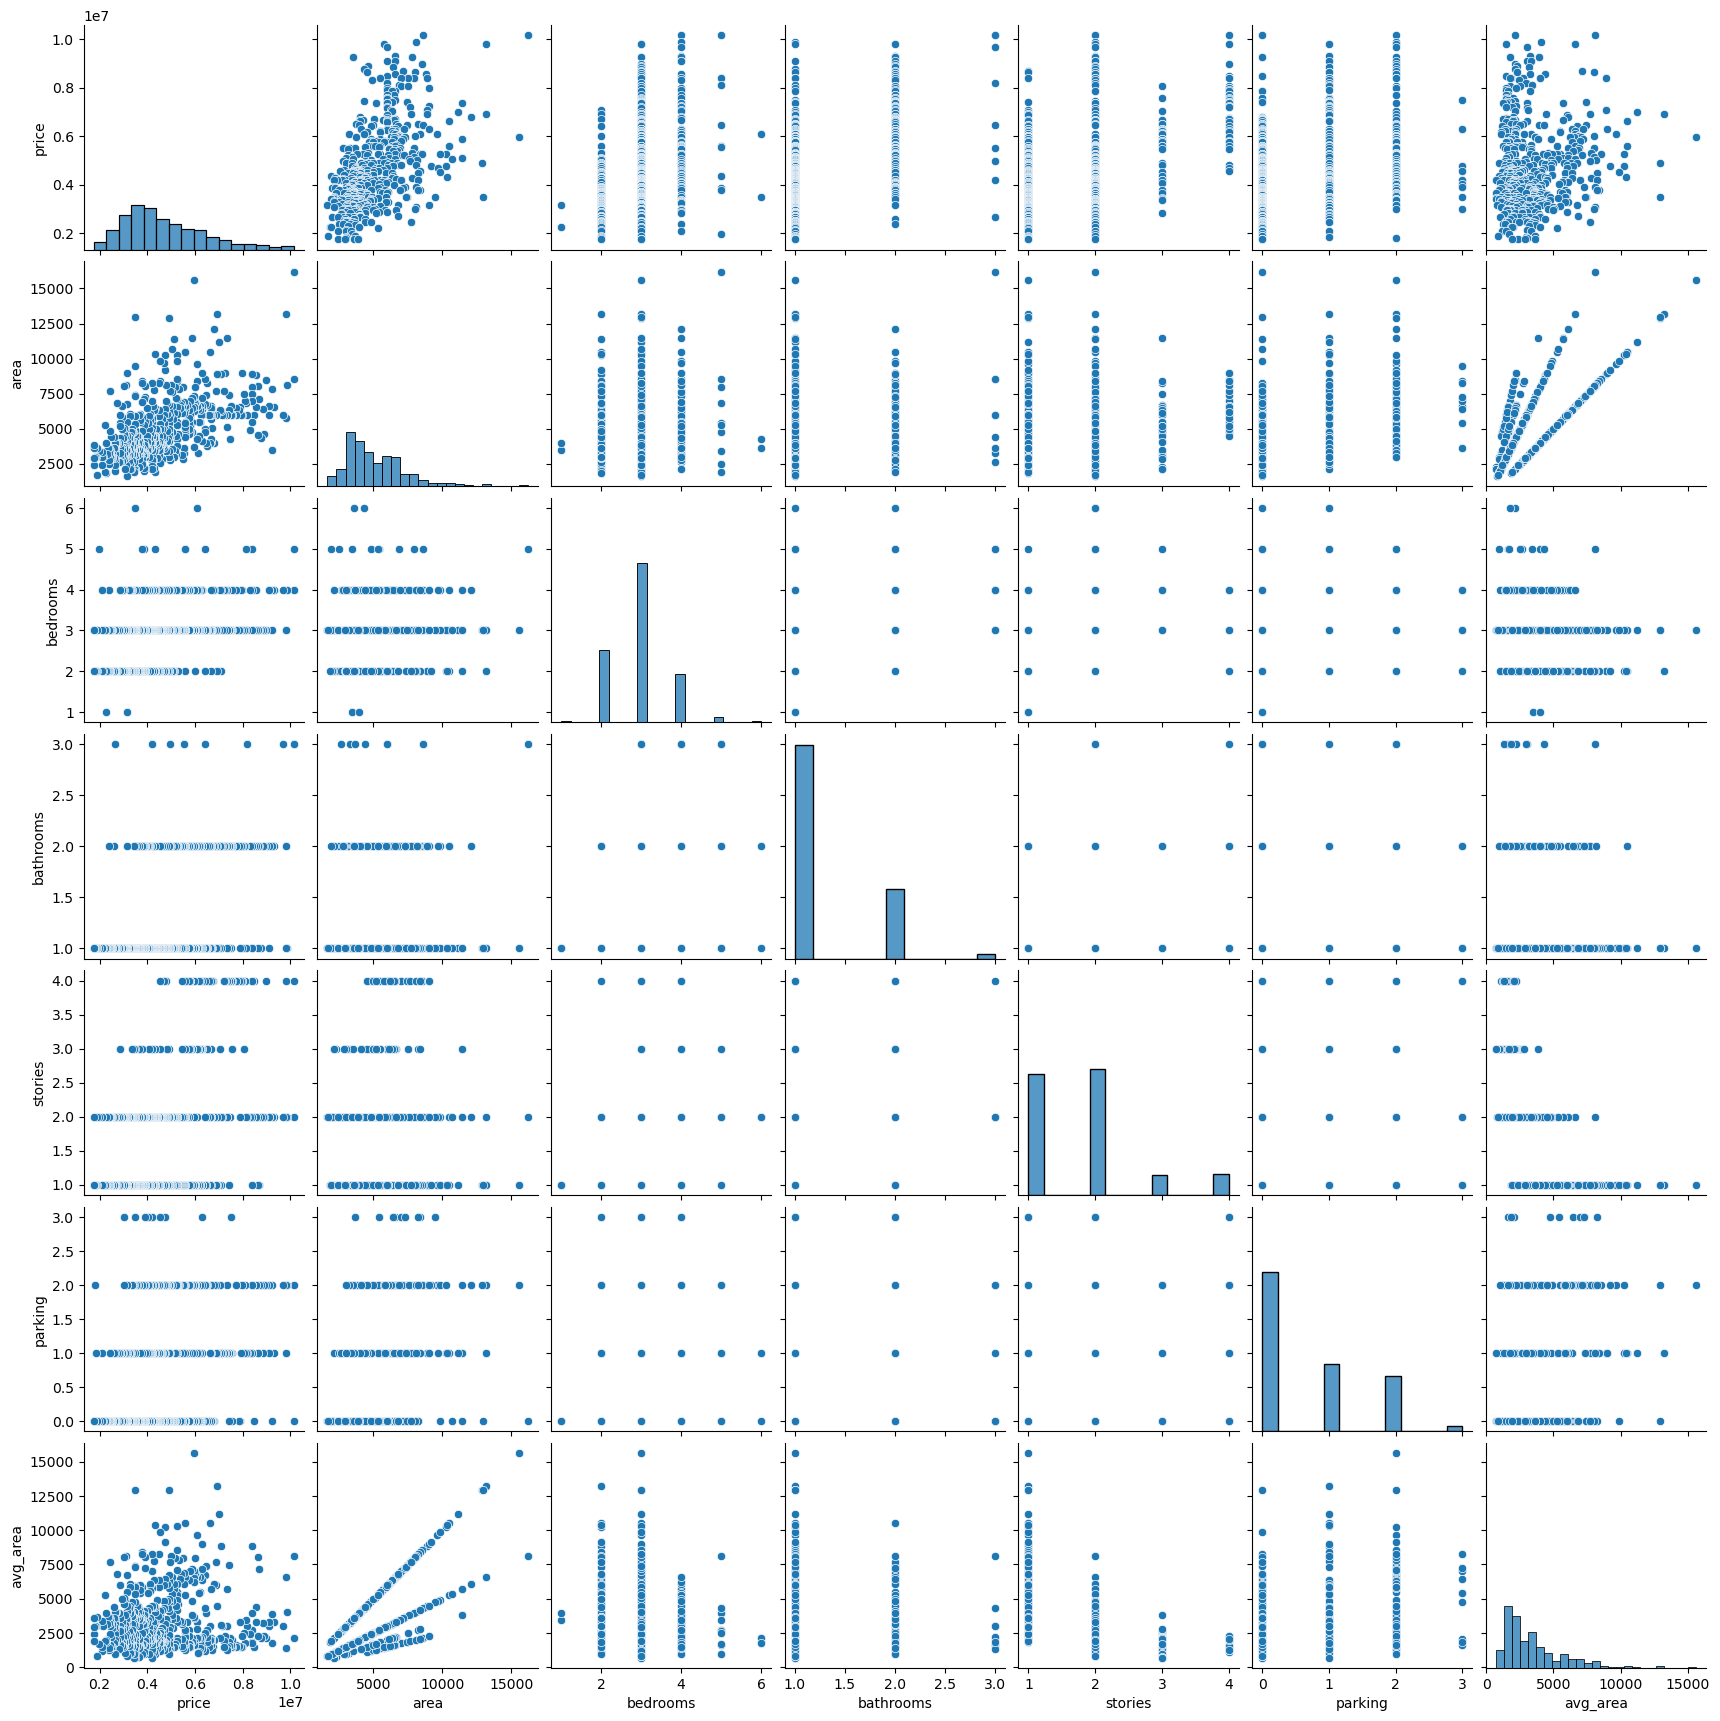

In [18]:
sns.pairplot(data)

<Axes: >

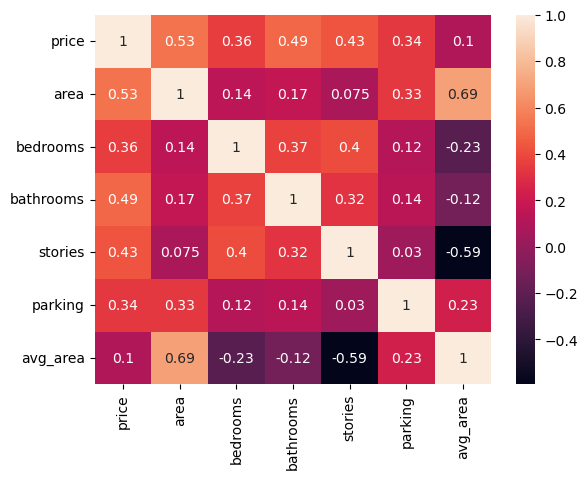

In [19]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

# Линейная регрессия. Обучение первой модели с помощью sklearn

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [63]:
target = 'price'
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=target), data[target], 
                                                    test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape

((431, 13), (108, 13))

In [65]:
categorical_columns = X_train.columns[X_train.dtypes==object]
numerical_columns = X_train.columns[X_train.dtypes!=object]

In [66]:
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [67]:
numerical_columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'avg_area'], dtype='object')

In [68]:
X_train.describe()

,area,bedrooms,bathrooms,stories,parking,avg_area
count,431.00,431.00,431.00,431.00,431.00,431.00
mean,5081.64,2.98,1.26,1.81,0.64,3447.13
std,2174.50,0.75,0.48,0.87,0.83,2285.64
min,1650.00,1.00,1.00,1.00,0.00,715.00
25%,3520.00,3.00,1.00,1.00,0.00,1800.00
50%,4500.00,3.00,1.00,2.00,0.00,2700.00
75%,6355.00,3.00,1.00,2.00,1.00,4285.00
max,16200.00,6.00,3.00,4.00,3.00,15600.00


In [69]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [70]:
X_train.describe()

,area,bedrooms,bathrooms,stories,parking,avg_area
count,4.31e+02,4.31e+02,4.31e+02,4.31e+02,4.31e+02,4.31e+02
mean,1.38e-16,1.36e-16,2.17e-16,1.24e-17,4.95e-17,-3.97e-17
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.58e+00,-2.66e+00,-5.50e-01,-9.38e-01,-7.65e-01,-1.20e+00
25%,-7.19e-01,2.49e-02,-5.50e-01,-9.38e-01,-7.65e-01,-7.21e-01
50%,-2.68e-01,2.49e-02,-5.50e-01,2.14e-01,-7.65e-01,-3.27e-01
75%,5.86e-01,2.49e-02,-5.50e-01,2.14e-01,4.34e-01,3.67e-01
max,5.12e+00,4.05e+00,3.61e+00,2.52e+00,2.83e+00,5.32e+00


In [71]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe.fit(X_train[categorical_columns])
X_train = pd.concat([
    X_train.drop(columns=categorical_columns).reset_index(drop=True),
    pd.DataFrame(ohe.transform(X_train[categorical_columns]), columns=ohe.get_feature_names_out())
], axis=1)
X_test = pd.concat([
    X_test.drop(columns=categorical_columns).reset_index(drop=True),
    pd.DataFrame(ohe.transform(X_test[categorical_columns]), columns=ohe.get_feature_names_out())
], axis=1)

In [72]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking,avg_area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-0.85,0.02,-0.55,0.21,1.63,-0.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.03,0.02,-0.55,0.21,-0.77,-0.41,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.80,0.02,-0.55,0.21,1.63,0.46,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.19,0.02,-0.55,-0.94,-0.77,0.90,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.27,0.02,-0.55,0.21,-0.77,-0.52,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [73]:
regression = LinearRegression()
regression = regression.fit(X_train, y_train)

In [74]:
pred_train = regression.predict(X_train)
print(f'Train MAE: {mean_absolute_error(y_train, pred_train)}')
print(f'Train MSE: {mean_squared_error(y_train, pred_train, squared=False)}')
print(f'Train R^2: {r2_score(y_train, pred_train)}')

Train MAE: 712620.8569566489
Train MSE: 956092.453973996
Train R^2: 0.6599952170148453


In [75]:
pred_test = regression.predict(X_test)
print(f'Test MAE: {mean_absolute_error(y_test, pred_test)}')
print(f'Test MSE: {mean_squared_error(y_test, pred_test, squared=False)}')
print(f'Test R^2: {r2_score(y_test, pred_test)}')

Test MAE: 768108.3481826832
Test MSE: 1033219.2613340396
Test R^2: 0.7216142365450509


In [76]:
pd.DataFrame({'feature': X_train.columns, 'coef': regression.coef_})\
        .sort_values(by='coef', key=abs, ascending=False)

,feature,coef
10,airconditioning_yes,805280.42
9,hotwaterheating_yes,712655.35
11,prefarea_yes,585827.11
2,bathrooms,447595.14
7,guestroom_yes,430348.00
0,area,421901.68
6,mainroad_yes,420538.44
3,stories,416080.81
13,furnishingstatus_unfurnished,-365992.06
8,basement_yes,243314.33


# Сравнение и валидация моделей

## Переобучение и недообучение

![](1__7OPgojau8hkiPUiHoGK_w.png)

In [77]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [78]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train);

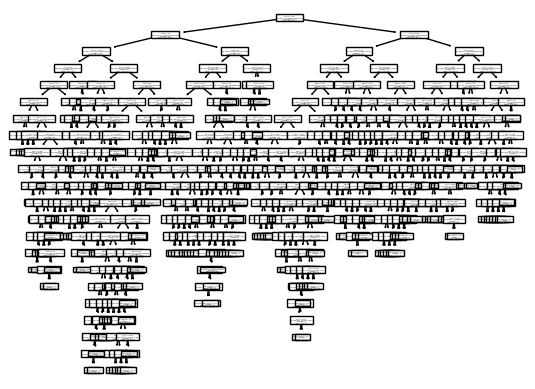

In [79]:
plot_tree(tree);

In [80]:
pred_train = tree.predict(X_train)
print(f'Train R^2: {r2_score(y_train, pred_train)}')

Train R^2: 0.9991180891988524


In [81]:
pred_test = tree.predict(X_test)
print(f'Test R^2: {r2_score(y_test, pred_test)}')

Test R^2: 0.3378793815444052


In [82]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train);

In [83]:
pred_train = tree.predict(X_train)
print(f'Train R^2: {r2_score(y_train, pred_train)}')

Train R^2: 0.530546785080174


In [84]:
pred_test = tree.predict(X_test)
print(f'Test R^2: {r2_score(y_test, pred_test)}')

Test R^2: 0.5175238979895842


 ## Подбор гиперпараметров

In [85]:
max_depths = range(1, 17)
train_r2 = []
test_r2 = []
for d in max_depths:
    tree = DecisionTreeRegressor(max_depth=d)
    tree.fit(X_train, y_train)
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    train_r2.append(r2_score(y_train, pred_train))
    test_r2.append(r2_score(y_test, pred_test))

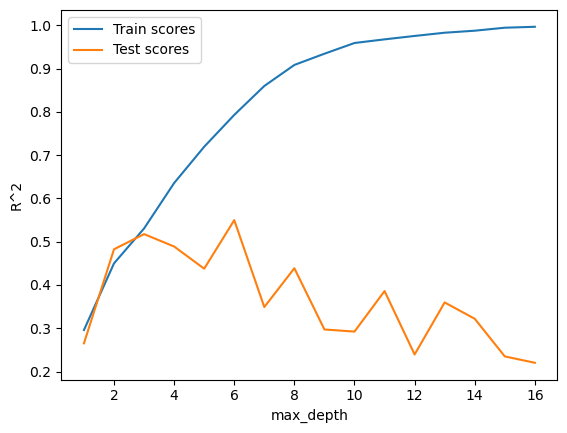

In [86]:
plt.plot(max_depths, train_r2, label='Train scores')
plt.plot(max_depths, test_r2, label='Test scores')
plt.ylabel('R^2')
plt.xlabel('max_depth')
plt.legend()

## Кросс-валидация

![](crossval.png)

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cv_r2 = []
for d in max_depths:
    tree = DecisionTreeRegressor(max_depth=d)
    cv_score = cross_val_score(tree, X_train, y_train, scoring='r2', cv=3, )
    cv_score = cv_score.mean()
    cv_r2.append(cv_score)

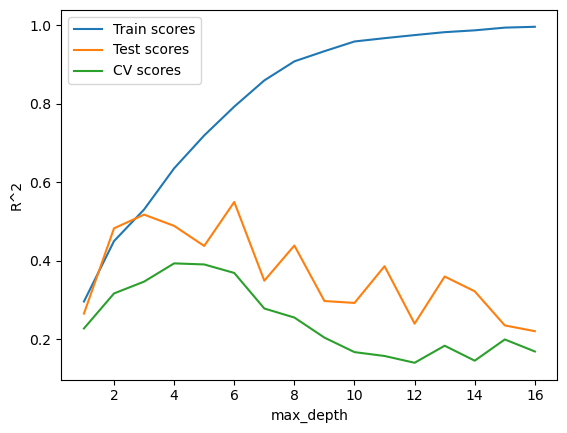

In [89]:
plt.plot(max_depths, train_r2, label='Train scores')
plt.plot(max_depths, test_r2, label='Test scores')
plt.plot(max_depths, cv_r2, label='CV scores')

plt.ylabel('R^2')
plt.xlabel('max_depth')
plt.legend()

X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


# Способы улучшения качества моделей, подбор гиперпараметров 

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
optuna.logging.set_verbosity(0)

from sklearn.ensemble import RandomForestRegressor

## GridSearchCV

In [92]:
param_grid = {
    'n_estimators': [10, 100, 500, 1000], 
    'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth': [1, 3, 5, 7, 9, 11],
    'min_samples_split': [0.01, 0.05, 0.1, 0.2], 
    'min_samples_leaf': [0.01, 0.05, 0.1, 0.2], 
    'max_features': ['sqrt', 'log2', None, 0.5], 
} # 6144, 18432
forest = RandomForestRegressor(random_state=42)
cv = GridSearchCV(forest, param_grid, cv=3, scoring='r2', n_jobs=-1)

In [93]:
%%time
cv.fit(X_train, y_train)

CPU times: total: 35.9 s
Wall time: 20min 32s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [10, 100, 500, 1000]},
             scoring='r2')

In [94]:
cv.best_score_

0.5940795531505066

In [95]:
cv.score(X_train, y_train)

0.7064175090070519

In [96]:
cv.score(X_test, y_test)

0.6413554175585374

In [97]:
cv.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 1000}

## RandomizedSearchCV

In [98]:
param_grid = {
    'n_estimators': [10, 100, 500, 1000], 
    'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth': [1, 3, 5, 7, 9, 11],
    'min_samples_split': [0.01, 0.05, 0.1, 0.2], 
    'min_samples_leaf': [0.01, 0.05, 0.1, 0.2], 
    'max_features': ['sqrt', 'log2', None, 0.5], 
} # 16128, 48384
forest = RandomForestRegressor(random_state=42)
cv = RandomizedSearchCV(forest, param_grid, cv=3, scoring='r2', n_jobs=-1, random_state=42, n_iter=50)

In [99]:
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [1, 3, 5, 7, 9, 11],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5],
                                        'min_samples_leaf': [0.01, 0.05, 0.1,
                                                             0.2],
                                        'min_samples_split': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'n_estimators': [10, 100, 500, 1000]},
                   random_state=42, scoring='r2')

In [100]:
cv.best_score_

0.5824790524854667

In [101]:
cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 0.01,
 'min_samples_leaf': 0.01,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'squared_error'}

In [102]:
cv.score(X_train, y_train)

0.7010353209098206

In [103]:
cv.score(X_test, y_test)

0.635892462077567

## optuna

In [104]:
def objective(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [10, 100, 500, 1000])
    criterion = trial.suggest_categorical('criterion', ["squared_error", "absolute_error",
                                                        "friedman_mse", "poisson"])
    max_depth = trial.suggest_categorical('max_depth', [1, 3, 5, 7, 9, 11])
    min_samples_split = trial.suggest_categorical('min_samples_split', [0.01, 0.05, 0.1, 0.2])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [0.01, 0.05, 0.1, 0.2])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None, 0.5])
    forest = RandomForestRegressor(random_state=42, 
                                  **trial.params)
    score = cross_val_score(forest, X_train, y_train, scoring='r2', cv=3)
    score = score.mean()
    return -score


In [105]:
study = optuna.create_study()
study.optimize(objective, n_trials=50, timeout=10*60, n_jobs=-1)

In [106]:
study.best_params

{'n_estimators': 500,
 'criterion': 'squared_error',
 'max_depth': 11,
 'min_samples_split': 0.01,
 'min_samples_leaf': 0.01,
 'max_features': 0.5}

In [107]:
study.best_value

-0.5810868808700227

In [111]:
forest = RandomForestRegressor(random_state=42, **study.best_params)

In [112]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=0.5, min_samples_leaf=0.01,
                      min_samples_split=0.01, n_estimators=500,
                      random_state=42)

In [113]:
pred_train = forest.predict(X_train)
print(f'Train R^2: {r2_score(y_train, pred_train)}')

Train R^2: 0.7421823726213572


In [114]:
pred_test = forest.predict(X_test)
print(f'Test R^2: {r2_score(y_test, pred_test)}')

Test R^2: 0.6704428746460167
